# Univariate statistics

Basics univariate statistics are required to explore dataset:

- Discover associations between a variable of interest and potential predictors. It is strongly recommended to start with simple univariate methods before moving to complex multivariate predictors. 

- Assess the prediction performances of machine learning predictors.

- Most of the univariate statistics are based on the linear model which is one of the main model in machine learning.


## Estimators of the main statistical measures


### Mean

Properties of the expected value operator $\operatorname{E}(\cdot)$ of a random variable $X$

\begin{align}
    E(X + c) &= E(X) + c \\ 
    E(X + Y) &= E(X) + E(Y) \\ 
    E(aX)    &= a E(X)
\end{align}

The estimator $\bar{x}$ on a sample of size $n$: $x = x_1, ..., x_n$ is given by
$$
    \bar{x} = \frac{1}{n} \sum_i x_i
$$

$\bar{x}$ is itself a random variable with properties:

- $E(\bar{x}) = \bar{x}$,

- $Var(\bar{x}) = \frac{Var(X)}{n}$.

### Variance

$$
    Var(X) = E((X - E(X))^2) =  E(X^2) - (E(X))^2
$$

The estimator is
$$
    \sigma_x^2 = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2
$$

Note here the subtracted 1 degree of freedom (df) in the divisor. In standard statistical practice, $df=1$ provides an unbiased estimator of the variance of a hypothetical infinite population. With $df=0$ it instead provides a maximum likelihood estimate of the variance for normally distributed variables.

### Standard deviation

$$
    Std(X) = \sqrt{Var(X)}
$$

The estimator is simply $\sigma_x = \sqrt{\sigma_x^2}$.

### Covariance

$$
    Cov(X, Y) = E((X - E(X))(Y - E(Y))) =  E(XY) - E(X)E(Y).
$$

Properties: 
$$
    \operatorname{Cov}(X, X) = \operatorname{Var}(X)\\
    \operatorname{Cov}(X, Y) = \operatorname{Cov}(Y, X)\\
    \operatorname{Cov}(cX, Y) = c \operatorname{Cov}(X, Y)\\
    \operatorname{Cov}(X+c, Y) = \operatorname{Cov}(X, Y)\\
$$

The estimator with $df=1$ is
$$
    \sigma_{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x}) (y_i - \bar{y}).
$$

### Correlation

$$
    Cor(X, Y) = \frac{Cov(X, Y)}{Std(X)Std(Y)}
$$

The estimator is
$$
    \rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x} \sigma_{y}}.
$$

### Standard Error (SE) 

The standard error (SE) is the standard deviation (of the sampling distribution) of a statistic: 
$$
    SE(X) = \frac{Std(X)}{\sqrt{n}}.
$$

It is most commonly considered for the mean with the estimator $SE(\bar{x}) = \sigma_x/\sqrt{n}$.

### Exercises

- Generate 2 random samples: $x \sim N(1.78, 0.1)$ and $y \sim N(1.66, 0.1)$, both of size 10.

- Compute $\bar{x}, \sigma_x, \sigma_{xy}$ (`xbar, xvar, xycov`) using only the `np.sum()` operation. 
Explore the `np.` module to find out which numpy functions performs the same computations and compare them (using `assert`) with your previous results.

## Main distributions

### Normal distribution

The normal distribution, noted $\mathcal{N}$, is useful because of the central limit theorem (CLT) which states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.
Parameters: $\mu$ mean (location) and $\sigma^2>0$ variance. Estimators:
$\bar{x}$ and $\sigma_{x}$.

### The Chi-Square distribution

The chi-square or $\chi_n^2$ distribution with $n$ degrees of freedom (df) is the distribution of a sum of the squares of $n$ independent standard normal random variables $\mathcal{N}(0, 1)$. Let $X \sim \mathcal{N}(\mu, \sigma^2)$, then, $Z=(X - \mu)/\sigma \sim \mathcal{N}(0, 1)$, then:

- The squared standard $Z^2 \sim \chi_1^2$ (one df).

- **The distribution of sum of squares** of $n$ normal random variables: $\sum_i^n Z_i^2 \sim \chi_n^2$

The sum of two $\chi^2$ RV with $p$ and $q$ df is a $\chi^2$ RV with $p+q$ df. This is useful when summing/subtracting sum of squares.

### The Fisher's F-distribution

The $F$-distribution, $F_{n, p}$, with $n$ and $p$ degrees of freedom is the ratio of two independant $\chi^2$ variables. Let $X \sim \chi_n^2$ and $Y \sim \chi_p^2$ then: 
$$
    F_{n, p} = \frac{X/n}{Y/p}
$$

The $F$-distribution plays a central role in hypothesis testing answering the question: **Are two variances equals?**

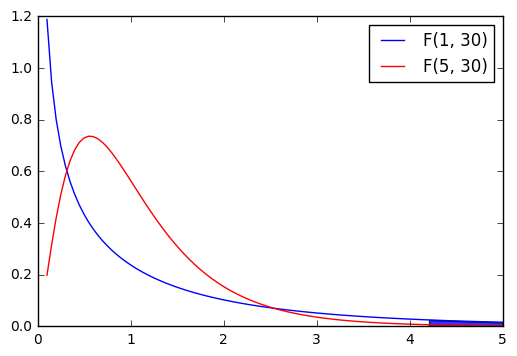

In [1]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline

fvalues = np.linspace(.1, 5, 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F.
# ie. 
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert  proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),
                 alpha=.8, label="P < 0.05")
plt.show()

### The  Student's $t$-distribution

Let $M \sim \mathcal{N}(0, 1)$ and $V \sim \chi_n^2$. The $t$-distribution, $T_n$, with $n$ degrees of freedom is the ratio:
$$
    T_n = \frac{M}{\sqrt{V/n}}
$$

The distribution of the difference between an estimated parmeter and its true (or assumed) value divided by the standard deviation of the estimated parameter (standard error) follow a $t$-distribution. **Is this parameters different from a given value?**

## Testing pairwise associations

Mass univariate statistical analysis: explore association betweens pairs of variable. 

- In statistics, a **categorical variable** or **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category". The levels are the possibles values of the variable. Number of levels = 2: binomial; Number of levels > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

- An **ordinal variable** is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high.

- A **continuous** or **quantitative variable** $x \in \mathbb{R}$ is one that can take any value in a range of possible values, possibly infinite.  E.g.: Salary, Experience in years.

What statistical test should I use? See: http://www.ats.ucla.edu/stat/mult_pkg/whatstat/

### Pearson correlation test (quantitative ~ quantitative)

Test the correlation coeficient of two quantitative variables. The test calculates a Pearson correlation coefficient and the $p$-value for testing non-correlation.

In [2]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

# Compute with scipy
cor, pval = stats.pearsonr(x, y)

###  One sample $t$-test (quantitative ~ constant)

The one-sample $t$-test is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is $1.75~m$.

#### 1. Model the data

Assume that height is normally distributed: $X \sim \mathcal{N}(\mu, \sigma)$.

#### 2. Fit: estimate the model parameters

$\bar{x}, \sigma_x$ are the estimators of $\mu, \sigma$.

#### 3. Test

In testing the null hypothesis that the population mean is equal to a specified value $\mu_0=1.75$, one uses the statistic:

$$
    t = \frac{\bar{x} - \mu_0}{\sigma_x/\sqrt{n}} 
$$

Although the parent population does not need to be normally distributed, the distribution of the population of sample means, $\overline{x}$, is assumed to be normal. By the central limit theorem, if the sampling of the parent population is independent then the sample means will be approximately normal.

#### Exercise

- Given the following samples, test whether its true mean is 1.75.

Warning, when computing the std or the variance, set `ddof=1`. The default
value, `ddof=0`, leads to the biased estimator of the variance.

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(seed=42)  # make example reproducible
n = 100
x = np.random.normal(loc=1.78, scale=.1, size=n)

- Compute the $t$-value (`tval`)

- Plot the `T(n-1)` distribution for 100 tvalues values within $[0, 10]$. Draw `P(T(n-1)>tval)` 
  i.e. color the surface defined by $x$ values larger than `tval` below the `T(n-1)`.
  Use the code.

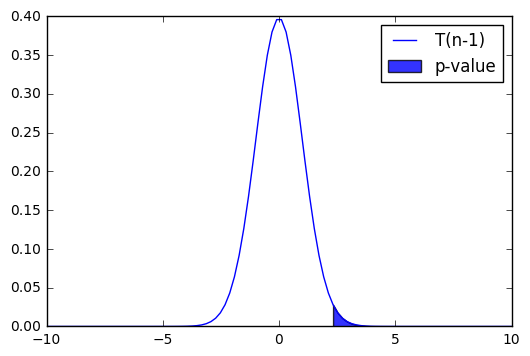

In [5]:
# compute with scipy
tval, pval = stats.ttest_1samp(x, 1.75)

#tval = 2.1598800019529265 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tval]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
_ = plt.legend()

- Compute the $p$-value: `P(T(n-1)>tval)`.

- The $p$-value is one-sided: a two-sided test would test `P(T(n-1) > tval)` and `P(T(n-1) < -tval)`. What would the two-sided $p$-value be?
  
- Compare the two-sided $p$-value with the one obtained by `stats.ttest_1samp`
using `assert np.allclose(arr1, arr2)`.

### Two sample $t$-test  (quantitative ~ categorial (2 levels))

The two-sample $t$-test (Snedecor and Cochran, 1989) is used to determine if two population means are equal. There are several variations on this test.
If data are paired (e.g. 2 measures, before and after treatment for each individual) use the one-sample $t$-test of the difference. The variances of the two samples may be assumed to be equal (a.k.a. homoscedasticity) or unequal (a.k.a. heteroscedasticity).

#### 1. Model the data

Assume that the two random variables are normally distributed: $x \sim \mathcal{N}(\mu_x, \sigma_x), y \sim \mathcal{N}(\mu_y, \sigma_y)$.

#### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{x}, \sigma_x, \bar{y}, \sigma_y$.

#### 3. $t$-test

Generally $t$-tests form the ratio between the amount of information explained by the model (i.e. the effect size) with the square root of the unexplained variance.

In testing the null hypothesis that the two population means are equal, one uses the $t$-statistic of unpaired two samples $t$-test:

$$
    t = \frac{\text{effect size}}{\sqrt{\text{unexplained variance}}} 
$$

![title](images/two_samples_ttest.png)

##### Equal or unequal sample sizes, equal variance

This test is used only when it can be assumed that the two distributions have the same variance. (When this assumption is violated, see below.) The $t$ statistic, that is used to test whether the means are different, can be calculated as follows:

$$
t = \frac{\bar{x} - \bar{y}}{\sigma \cdot \sqrt{\frac{1}{n_x}+\frac{1}{n_y}}},
$$

where

$$
\sigma = \sqrt{\frac{\sigma_{x}^2(n_x-1)+\sigma_{y}^2(n_y-1)}{n_x+n_y-2}}
$$

is an estimator of the common standard deviation of the two samples: it is defined in this way so that its square is an unbiased estimator of the common variance whether or not the population means are the same.

##### Equal or unequal sample sizes, unequal variances (Welch's $t$-test)
Welch's $t$-test defines the $t$ statistic as

$$
t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}}}.
$$

To compute the $p$-value one needs the degrees of freedom associated with this variance estimate. It is approximated using the Welch–Satterthwaite equation:

$$
\nu \approx \frac{\left(\frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}\right)^2}{\frac{\sigma^4_x}{n_x^2(n_x-1)} + \frac{\sigma^4_y}{n_y^2(n_y-1)}}.
$$

#### Exercise

Given the following two samples, test whether their means are equal using the **standard t-test, assuming equal variance**.

In [4]:
import scipy.stats as stats
nx, ny = 50, 25
x = np.random.normal(loc=1.76, scale=0.1, size=nx)
y = np.random.normal(loc=1.70, scale=0.12, size=ny)

# Compute with scipy
tval, pval = stats.ttest_ind(x, y, equal_var=True)

- Compute the $t$-value.

- Compute the $p$-value.

- The $p$-value is one-sided: a two-sided test would test `P(T > tval)`
  and `P(T < -tval)`. What would the two sided $p$-value be?

- Compare the two-sided $p$-value with the one obtained by `stats.ttest_ind`
using `assert np.allclose(arr1, arr2)`.

### ANOVA $F$-test (quantitative ~ categorial (>2 levels))

Analysis of variance (ANOVA) provides a statistical test of whether or not the means of several groups are equal, and therefore generalizes the $t$-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample $t$-tests, but is less conservative.

Here we will consider one-way ANOVA with one independent variable.

#### 1. Model the data

A company has applied three marketing strategies to three samples of customers in order increase their business volume. The marketing is asking whether the strategies led to different increases of business volume. Let $y_1, y_2$ and $y_3$ be the three samples of business volume increase.

Here we assume that the three populations were sampled from three random variables that are normally distributed. I.e., $Y_1 \sim N(\mu_1, \sigma_1), Y_2 \sim N(\mu_2, \sigma_2)$ and $Y_3 \sim N(\mu_3, \sigma_3)$.

#### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{y}_i, \sigma_i,\;\; \forall i \in \{1, 2, 3\}$.

#### 3. $F$-test

**Source**: https://en.wikipedia.org/wiki/F-test

The ANOVA $F$-test can be used to assess whether any of the strategies is on average superior, or inferior, to the others versus the null hypothesis that all four strategies yield the same mean response (increase of business volume). This is an example of an "omnibus" test, meaning that a single test is performed to detect any of several possible differences. Alternatively, we could carry out pair-wise tests among the strategies. The advantage of the ANOVA $F$-test is that we do not need to pre-specify which strategies are to be compared, and we do not need to adjust for making multiple comparisons. The disadvantage of the ANOVA $F$-test is that if we reject the null hypothesis, we do not know which strategies can be said to be significantly different from the others.

The formula for the one-way ANOVA F-test statistic is

$$
F = \frac{\text{explained variance}}{\text{unexplained variance}},
$$

or

$$
F = \frac{\text{between-group variability}}{\text{within-group variability}}.
$$

The "explained variance", or "between-group variability" is

$$
\sum_i n_i(\bar{Y}_{i\cdot} - \bar{Y})^2/(K-1),
$$

where $\bar{Y}_{i\cdot}$ denotes the sample mean in the $i$th group, $n_i$ is the number of observations in the $i$th group, $\bar{Y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

The "unexplained variance", or "within-group variability" is

$$
\sum_{ij} (Y_{ij}-\bar{Y}_{i\cdot})^2/(N-K), 
$$

where $Y_{ij}$ is the $j$th observation in the $i$th out of $K$ groups and $N$ is the overall sample size. This $F$-statistic follows the $F$-distribution with $K-1$ and $N-K$ degrees of freedom under the null hypothesis. The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

Note that when there are only two groups for the one-way ANOVA F-test, $F=t^2$ where $t$ is the Student's $t$ statistic.

#### Exercise

Perform an ANOVA on the following dataset

- Compute between and within variances
- Compute $F$-value: `fval`
- Compare the $p$-value with the one obtained by `stats.f_oneway` using `assert np.allclose(arr1, arr2)`

In [11]:
# dataset
mu_k = np.array([1, 2, 3])    # means of 3 samples
sd_k = np.array([1, 1, 1])    # sd of 3 samples
n_k = np.array([10, 20, 30])  # sizes of 3 samples
grp = [0, 1, 2]               # group labels
n = np.sum(n_k)
label = np.hstack([[k] * n_k[k] for k in [0, 1, 2]])

y = np.zeros(n)
for k in grp:
    y[label == k] = np.random.normal(mu_k[k], sd_k[k], n_k[k])

# Compute with scipy
fval, pval = stats.f_oneway(y[label == 0], y[label == 1], y[label == 2])

### Chi-square, $\chi^2$ (categorial ~ categorial)

Computes the chi-square, $\chi^2$, statistic and $p$-value for the hypothesis test of independence of frequencies in the observed contingency table. The observed frequencies are tested against an expected contingency table obtained by computing expected frequencies based on the marginal sums under the assumption of independence.

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Dataset:
# 15 samples:
# 10 first with canalar tumor, 5 last without
canalar_tumor = np.array([1] * 10 + [0] * 5)
# 8 first with metastasis, 6 without, the last with.
meta = np.array([1] * 8 + [0] * 6 + [1])

crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)

chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[ 2.  3.]
 [ 4.  6.]]


Computing expected cross-table

In [13]:
# Compute expected cross-table based on proportion
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()
canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()

print('Canalar tumor frequency? Yes: %.2f' % canalar_tumor_freq[0], 'No: %.2f' % canalar_tumor_freq[1])
print('Metastasis frequency? Yes: %.2f' % meta_freq[0], 'No: %.2f' % meta_freq[1])

print('Expected frequecies:')
print(np.outer(canalar_tumor_freq, meta_freq))

print('Expected cross-table:')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))

Canalar tumor frequency? Yes: 0.33 No: 0.67
Metastasis frequency? Yes: 0.40 No: 0.60
Expected frequecies:
[[ 0.13333333  0.2       ]
 [ 0.26666667  0.4       ]]
Expected cross-table:
[[ 2.  3.]
 [ 4.  6.]]


### Exercise

Write a function `univar_stat(df, target, variables)` that computes the parametric statistics and $p$-values between the `target` variable (provided as as string) and all `variables` (provided as a list of string) of the pandas DataFrame `df`. The target is a quantitative variable but variables may be quantitative or qualitative. The function returns a DataFrame with four columns: `variable`, `test`, `value`, `p_value`.

Apply it to the salary dataset available at https://raw.github.com/neurospin/pystatsml/master/data/salary_table.csv, with target being `S`: salaries for IT staff in a corporation.

## Non-parametric test of pairwise associations

### Spearman rank-order correlation (quantitative ~ quantitative)

The Spearman correlation is a non-parametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as $x$ increases, so does $y$. Negative correlations imply that as $x$ increases, $y$ decreases.

Non-Parametric Spearman cor test, cor: 0.2996, pval: 0.0345


/home/ed203246/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Parametric Pearson cor test: cor: 0.0426, pval: 0.7687


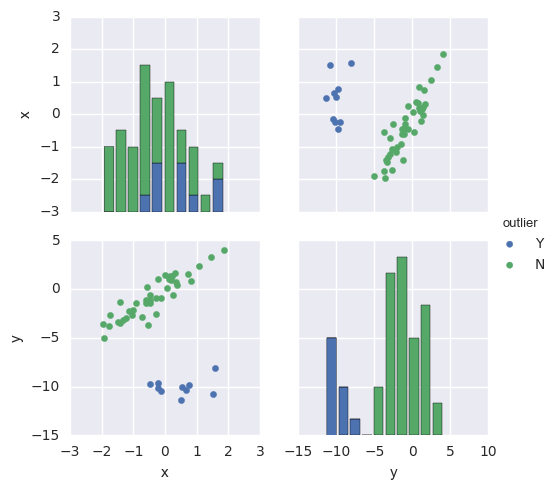

In [7]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=42)  # make example reproducible

n = 50
noutliers = 10
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
y[:noutliers] = np.random.normal(loc=-10, size=noutliers)  # Add 40 outliers
outlier = np.array(["N"] * n)
outlier[:noutliers] = "Y"

# Compute with scipy
cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))


# Plot distribution + pairwise scatter plot
df = pd.DataFrame(dict(x=x, y=y, outlier=outlier))
g = sns.PairGrid(df, hue="outlier")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g = g.add_legend()

# Compute the parametric Pearsonw cor test
cor, pval = stats.pearsonr(x, y)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

### Wilcoxon signed-rank test (quantitative ~ cte)

Source: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.

It can be used as an alternative to the paired Student's $t$-test, $t$-test for matched pairs, or the $t$-test for dependent samples when the population cannot be assumed to be normally distributed.

When to use it? Obeserve the data distribution:
- presence of outliers
- the distribution of the residuals is not Gaussian

It has a lower sensitivity compared to $t$-test. May be problematic to use when the sample size is small.

Null hypothesis $H_0$: difference between the pairs follows a symmetric distribution around zero.

In [9]:
import scipy.stats as stats
n = 20
# Buisness Volume time 0
bv0 = np.random.normal(loc=3, scale=.1, size=n)
# Buisness Volume time 1
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Paired t-test
print(stats.ttest_rel(bv0, bv1))

# Wilcoxon
print(stats.wilcoxon(bv0, bv1))

Ttest_relResult(statistic=0.77854266212061596, pvalue=0.44583743298063039)
WilcoxonResult(statistic=26.0, pvalue=0.0031851432686599455)


### Mann–Whitney $U$ test (quantitative ~ categorial (2 levels))

In statistics, the Mann–Whitney $U$ test (also called the Mann–Whitney–Wilcoxon, Wilcoxon rank-sum test or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

It can be applied on unknown distributions contrary to e.g. a $t$-test that has to be applied only on normal distributions, and it is nearly as efficient as the $t$-test on normal distributions.

In [11]:
import scipy.stats as stats
n = 20
# Buismess Volume group 0
bv0 = np.random.normal(loc=1, scale=.1, size=n)

# Buismess Volume group 1
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Two-samples t-test
print(stats.ttest_ind(bv0, bv1))

# Wilcoxon
print(stats.mannwhitneyu(bv0, bv1))

Ttest_indResult(statistic=0.62748520384004158, pvalue=0.53409388734462837)
MannwhitneyuResult(statistic=43.0, pvalue=2.3024709881112628e-05)


## Linear model

For the regression case, the statistical model is as follows. Given a (random) sample $(y_i, x_{i}^1, \ldots, x_{i}^p), \, i = 1, \ldots, n$ the relation between the observations $y_i$ and the independent variables $x_i^p$ is formulated as

$$
    y_i = \beta_0 + \beta_1 x_{i}^1 + \cdots + \beta_p x_{i}^p + \varepsilon_i \qquad i = 1, \ldots, n 
$$

- **An independent variable (IV)** is exactly what it sounds like. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables. In Machine Learning, these variables are also called the **predictors**.

- A **dependent variable** is exactly what it sounds like. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does. In Machine Learning this variable is called a **target varbiable**.

### Simple linear regression (one continuous independant variable (IV))

Using the dataset "salary", explore the association between the dependant variable (e.g. Salary) and the independant variable (e.g.: Experience is quantitative).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.github.com/neurospin/pystatsml/master/data/salary_table.csv'
salary = pd.read_csv(url)

#### 1. Model the data

Model the data on some **hypothesis** e.g.: salary is a linear function of the experience.

$$
    \text{salary}_i = \beta~\text{experience}_i + \beta_0 + \epsilon_i,
$$

more generally

$$
    y_i = \beta~x_i + \beta_0 + \epsilon_i
$$

- $\beta$: the slope or coefficient or parameter of the model,

- $\beta_0$: the **intercept** or **bias** is the second parameter of the model,

- $\epsilon_i$: is the $i$th error, or residual with $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

This model is similar to a correlation.

#### 2. Fit: estimate the model parameters

The goal it so estimate $\beta$, $\beta_0$ and $\sigma^2$.

Minimizes the **mean squared error (MSE)** or the **Sum squared error (SSE)**. The so-called **Ordinary Least Squares (OLS)** finds $\beta, \beta_0$ that minimizes the $SSE = \sum_i \epsilon_i^2$

$$
SSE = \sum_i(y_i - \beta~x_i - \beta_0)^2
$$

Recall from calculus that an extreme point can be found by computing where the derivative is zero, i.e. to find the intercelt, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta_0} = \sum_i(y_i - \beta~x_i - \beta_0) = 0\\
\sum_i y_i = \beta~\sum_i x_i + n~\beta_0\\
n~\bar{y} = n~\beta~\bar{x} + n~\beta_0\\
\beta_0 = \bar{y} - \beta~\bar{x}
$$

To find the regression coefficient, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta} = \sum_i x_i(y_i - \beta~x_i - \beta_0) = 0
$$

Plug in $\beta_0$:

$$
\sum_i x_i(y_i - \beta~x_i - \bar{y} + \beta \bar{x}) = 0\\
\sum_i x_i y_i - \bar{y}\sum_i x_i = \beta \sum_i(x_i - \bar{x})
$$

Divide both sides by $n$:

$$
\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x} = \frac{1}{n}\beta \sum_i(x_i - \bar{x})\\
\beta = \frac{\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x}}{\frac{1}{n}\sum_i(x_i - \bar{x})} = \frac{Cov(x, y)}{Var(x)}.
$$

y = 491.486913 x + 13584.043803,  r: 0.538886, r-squared: 0.290398,
p-value: 0.000112, std_err: 115.823381


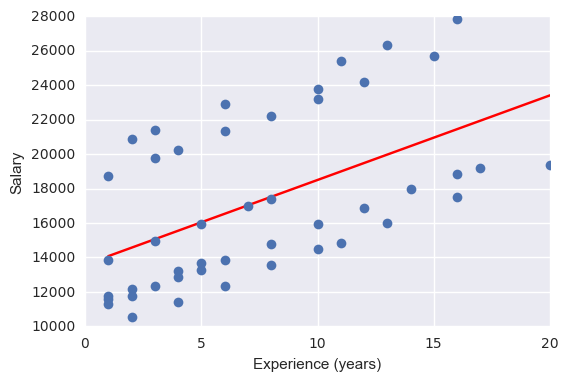

In [12]:
from scipy import stats
import numpy as np
y, x = salary.salary, salary.experience
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y = %f x + %f,  r: %f, r-squared: %f,\np-value: %f, std_err: %f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))
# plotting the line
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

#### 3. $F$-Test

##### 3.1 Goodness of fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question. We will consider the **explained variance**  also known as the coefficient of determination, denoted $R^2$ pronounced **R-squared**.

The total sum of squares, $SS_\text{tot}$ is the sum of the sum of squares explained by the regression, $SS_\text{reg}$, plus the sum of aquares of residuals unexplained by the regression, $SS_\text{res}$, also called the SSE, i.e. such that

$$
SS_\text{tot} = SS_\text{reg} + SS_\text{res}
$$

![title](images/Coefficient_of_Determination.png)

The mean of $y$ is

$$
\bar{y} = \frac{1}{n}\sum_i y_i.
$$

The total sum of squares is the total squared sum of deviations from the mean of $y$, i.e.

$$
SS_\text{tot}=\sum_i (y_i-\bar{y})^2
$$

The regression sum of squares, also called the explained sum of squares:

$$
SS_\text{reg} = \sum_i (\hat{y}_i -\bar{y})^2,
$$

where $\hat{y}_i = \beta x_i + \beta_0$ is the estimated value of salary $\hat{y}_i$ given a value of experience $x_i$.

The sum of squares of the residuals, also called the residual sum of squares (RSS) is:

$$
SS_\text{res}=\sum_i (y_i - \hat{y_i})^2.
$$

$R^2$ is the explained sum of squares of errors. It is the variance explain by the regression divided by the total variance, i.e.

$$
R^2 = \frac{\text{explained SS}}{\text{total SS}}
    = \frac{SS_\text{reg}}{SS_{tot}} 
    = 1 - {SS_{res}\over SS_{tot}}.
$$

#####   3.2 Test

Let $\hat{\sigma}^2 = SS_\text{res} / (n-2)$ be an estimator of the variance of $\epsilon$. The $2$ stem from the number of estimated parameters, intercept and coefficient.

- **Unexplained variance**: $\frac{SS_\text{res}}{\hat{\sigma}^2} \sim \chi_{n-2}^2$

- **Explained variance**: $\frac{SS_\text{reg}}{\hat{\sigma}^2} \sim \chi_{1}^2$. The single degree of freedom comes from the the difference between $\frac{SS_\text{tot}}{\hat{\sigma}^2} (\sim \chi^2_{n-1})$ and $\frac{SS_\text{res}}{\hat{\sigma}^2} (\sim \chi_{n-2}^2)$, i.e. $(n-1) - (n-2)$ degree of freedom.

The Fisher statistics of the ratio of two variances:
$$
    F = \frac{\text{Explained variance}}{\text{Unexplained variance}} = \frac{SS_\text{reg} / 1}{ SS_\text{res} / (n - 2)} \sim F(1, n-2)
$$

Using the $F$-distribution, compute the probability of observing a value greater than $F$ under $H_0$, i.e.: $P(x > F|H_0)$, i.e. the survival function $(1 - \text{Cumulative Distribution Function})$ at $x$ of the given $F$-distribution.

####  Exercise

Compute:

- $\bar{y}$: `y_mu`

- $SS_\text{tot}$: `ss_tot`

- $SS_\text{reg}$: `ss_reg`

- $SS_\text{res}$: `ss_res`

- Check partition of variance formula based on sum of squares by using `assert np.allclose(val1, val2, atol=1e-05)`

- Compute $R^2$ and compare it with the `r_value` above

- Compute the $F$ score

- Compute the $p$-value:
 *  Plot the $F(1, n)$ distribution for 100 $f$ values within $[10, 25]$. Draw $P(F(1, n) > F)$, i.e. color the surface defined by the $x$ values larger than $F$ below the $F(1, n)$.

 * $P(F(1, n) > F)$ is the $p$-value, compute it.

### Multiple regression

#### Theory

Muliple Linear Regression is the most basic supervised learning algorithm.

Given: a set of training data $\{x_1, ... , x_N\}$ with corresponding targets $\{y_1, . . . , y_N\}$.

In linear regression, we assume that the model that generates the data involves only a linear combination of the input variables, i.e.

$$
y(x_i, \beta) = \beta^0 + \beta^1 x_i^1 + ... + \beta^P x_i^P,
$$

or, simplified

$$
y(x_i, \beta) = \beta_0 + \sum_{j=1}^{P-1} \beta_j x_i^j.
$$

Extending each sample with an intercept, $x_i := [1, x_i] \in R^{P+1}$ allows us to use a more general notation based on linear algebra and write it as a simple dot product:

$$
y(x_i,\beta) = x_i^T\beta,
$$

where $\beta \in R^{P+1}$ is a vector of weights that define the $P+1$ parameters of the model. From now we have $P$ regressors + the intercept.

Minimize the Mean Squared Error MSE loss:

$$
MSE(\beta) = \frac{1}{N}\sum_{i=1}^{N}(y_i - y(x_i,\beta))^2 = \frac{1}{N}\sum_{i=1}^{N}(y_i - x_i^T\beta)^2
$$

Let $X = [x_0^T, ... , x_N^T]$ be a $N \times P+1$ matrix of $N$ samples of $P$ input features with one column of one and let be $y = [y_1, ... , y_N]$ be a vector of the $N$ targets. Then, using linear algebra, the **mean squared error (MSE) loss can be rewritten**:

$$
MSE(\beta) = \frac{1}{N}||y - X\beta||_2^2.
$$

The $\beta$ that minimises the MSE can be found by:

\begin{align}
\nabla_\beta \left(\frac{1}{N} ||y - X\beta||_2^2\right) &= 0\\
\frac{1}{N}\nabla_\beta (y - X\beta)^T (y - X\beta) &= 0\\
\frac{1}{N}\nabla_\beta (y^Ty - 2 \beta^TX^Ty + \beta X^TX\beta) &= 0\\
    -2X^Ty + 2 X^TX\beta &= 0\\
    X^TX\beta &= X^Ty\\
    \beta &= (X^TX)^{-1} X^Ty,
\end{align}

where $(X^TX)^{-1} X^T$ is a pseudo inverse of $X$.

#### Fit with `numpy`

In [13]:
import numpy as np
import scipy
np.random.seed(seed=42)  # make the example reproducible

# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))
## Our model needs an intercept so we add a column of 1s:
X[:, 0] = 1
print(X[:5, :])

betastar = np.array([10, 1., .5, 0.1])
e = np.random.normal(size=N)
y = np.dot(X, betastar) + e

# Estimate the parameters
Xpinv = scipy.linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]
Estimated beta:
 [ 10.14742501   0.57938106   0.51654653   0.17862194]


#### Exercise

1. What are the dimensions of $\mathrm{pinv}(X)$?

2. Compute the MSE between the predicted values and the true values.

## Linear model with statsmodels

Sources: http://statsmodels.sourceforge.net/devel/examples/

### Multiple regression

#### Interface with Numpy

In [14]:
import statsmodels.api as sm

## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())

# prediction of new values
ypred = model.predict(X)

# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           0.000106
Time:                        10:42:31   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

#### Interface with Pandas

Use `R` language syntax for data.frame. For an additive model:
$y_i = \beta^0 + x_i^1 \beta^1 + x_i^2 \beta^2 + \epsilon_i \equiv$ `y ~ x1 + x2`.


In [15]:
import statsmodels.formula.api as smfrmla

df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])

# Build a model excluding the intercept, it is implicit
model = smfrmla.ols("y ~ x1 + x2 + x3", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           0.000106
Time:                        10:42:43   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.1474      0.150     67.520      0.0

### Multiple regression with categorical independent variables or factors: Analysis of covariance (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression. ANCOVA evaluates whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable (IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables that are not of primary interest, known as covariates (CV).

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

try:
    salary = pd.read_csv("../data/salary_table.csv")
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/data/salary_table.csv'
    salary = pd.read_csv(url)

#### One-way AN(C)OVA

- ANOVA: one categorical independent variable, i.e. one factor.

- ANCOVA: ANOVA with some covariates.

In [24]:
import statsmodels.formula.api as smfrmla

oneway = smfrmla.ols('salary ~ management + experience', salary).fit()
print(oneway.summary())
aov = sm.stats.anova_lm(oneway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           1.90e-19
Time:                        10:45:13   Log-Likelihood:                -407.76
No. Observations:                  46   AIC:                             821.5
Df Residuals:                      43   BIC:                             827.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.021e+04    525.999     

#### Two-way AN(C)OVA

Ancova with two categorical independent variables, i.e. two factors.

In [25]:
import statsmodels.formula.api as smfrmla

twoway = smfrmla.ols('salary ~ education + management + experience', salary).fit()
print(twoway.summary())
aov = sm.stats.anova_lm(twoway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           2.23e-27
Time:                        10:45:17   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            8035.5976    

#### Comparing two nested models

`oneway` is nested within `twoway`.  Comparing two nested models tells us if the additional predictors (i.e. `education`) of the full model significantly decrease the residuals. Such comparison can be done using an $F$-test on residuals:

In [28]:
print(twoway.compare_f_test(oneway))  # return F, pval, df

(43.351589459181056, 7.6724495704954452e-11, 2.0)


#### Factor coding

See http://statsmodels.sourceforge.net/devel/contrasts.html

By default Pandas use "dummy coding". Explore:

In [21]:
print(twoway.model.data.param_names)
print(twoway.model.data.exog[:10, :])

['Intercept', 'education[T.Master]', 'education[T.Ph.D]', 'management[T.Y]', 'experience']
[[ 1.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  1.]
 [ 1.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.]
 [ 1.  0.  1.  0.  1.]
 [ 1.  1.  0.  1.  2.]
 [ 1.  1.  0.  0.  2.]
 [ 1.  0.  0.  0.  2.]
 [ 1.  0.  1.  0.  2.]
 [ 1.  1.  0.  0.  3.]]


#### Contrasts and post-hoc tests

In [22]:
# t-test of the specific contribution of experience:
ttest_exp = twoway.t_test([0, 0, 0, 0, 1])
ttest_exp.pvalue, ttest_exp.tvalue
print(ttest_exp)

# Alternatively, you can specify the hypothesis tests using a string
twoway.t_test('experience')

# Post-hoc is salary of Master different salary of Ph.D? 
# ie. t-test salary of Master = salary of Ph.D.
print(twoway.t_test('education[T.Master] = education[T.Ph.D]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0           546.1840     30.519     17.896      0.000       484.549   607.819
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0           147.8249    387.659      0.381      0.705      -635.069   930.719


## Multiple comparisons

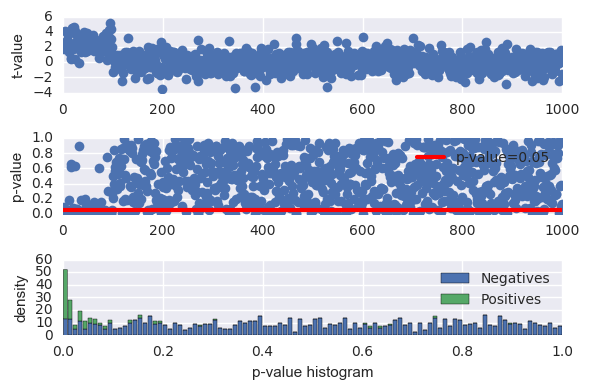

In [20]:
import numpy as np
np.random.seed(seed=42)  # make example reproducible

# Dataset
n_samples, n_features = 100, 1000
n_info = int(n_features/10)  # number of features with information
n1, n2 = int(n_samples/2), n_samples - int(n_samples/2)
snr = .5
Y = np.random.randn(n_samples, n_features)
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add some group effect for Pinfo features
Y[grp=="g1", :n_info] += snr

# 
import scipy.stats as stats
import matplotlib.pyplot as plt
tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)
for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp=="g1", j], Y[grp=="g2", j],
                                         equal_var=True)

fig, axis = plt.subplots(3, 1)#, sharex='col')

axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel("t-value")

axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
#axis[1].axhline(y=0.05, label="toto", color='red')
axis[1].set_ylabel("p-value")
axis[1].legend()

axis[2].hist([pvals[n_info:], pvals[:n_info]], 
    stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend()

plt.tight_layout()

Note that under the null hypothesis the distribution of the *p*-values is uniform.

Statistical measures:

- **True Positive (TP)** eqvalent to a hit. The test correctly concludes the presence of an effect.

- True Negative (TN). The test correctly concludes the absence of an effect.

- **False Positive (FP)** eqvalent to a false alarm, **Type I error**. The test improperly concludes the presence of an effect. Thresholding at $p\text{-value} < 0.05$ leads to 47 FP.

- False Negative (FN) eqvalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [24]:
P, N = n_info, n_features - n_info  # Positives, Negatives
TP = np.sum(pvals[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals[n_info: ] < 0.05)  # False Positives
print("No correction, FP: %i (exepected: %.2f), TP: %i" % (FP, N * 0.05, TP))

No correction, FP: 47 (exepected: 45.00), TP: 71


### Bonferroni correction for multiple comparisons

The Bonferroni correction is based on the idea that if an experimenter is testing $P$ hypotheses, then one way of maintaining the familywise error rate (FWER) is to test each individual hypothesis at a statistical significance level of $1/P$ times the desired maximum overall level.

So, if the desired significance level for the whole family of tests is $\alpha$ (usually 0.05), then the Bonferroni correction would test each individual hypothesis at a significance level of $\alpha/P$. For example, if a trial is testing $P = 8$ hypotheses with a desired $\alpha = 0.05$, then the Bonferroni correction would test each individual hypothesis at $\alpha = 0.05/8 = 0.00625$.

In [25]:
import statsmodels.sandbox.stats.multicomp as multicomp
_, pvals_fwer, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='bonferroni')
TP = np.sum(pvals_fwer[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fwer[n_info: ] < 0.05)  # False Positives
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

FWER correction, FP: 0, TP: 6


### The False discovery rate (FDR) correction for multiple comparisons

FDR-controlling procedures are designed to control the expected proportion of rejected null hypotheses that were incorrect rejections ("false discoveries"). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased rates of Type I errors.

In [26]:
import statsmodels.sandbox.stats.multicomp as multicomp
_, pvals_fdr, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='fdr_bh')
TP = np.sum(pvals_fdr[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fdr[n_info: ] < 0.05)  # False Positives

print("FDR correction, FP: %i, TP: %i" % (FP, TP))

FDR correction, FP: 3, TP: 20


## Exercise

This exercice has 2 goals: apply you knowledge of statistics using vectorized numpy operations.
Given the dataset provided for multpple comparison, compute the two-sample $t$-test (assuming equal variance) for each (column) feature of `Y` given the two groups defined by `grp`. You should return two vectors of size `n_features`: one for the $t$-values and one for the $p$-values.